In [4]:
import pandas as pd
%matplotlib inline
import os, sys
import itertools
import numpy as np
from sklearn.utils import shuffle
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import warnings
from sklearn import preprocessing

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
warnings.filterwarnings("ignore")

In [5]:
ml_join_file = "C:\\Users\\e394102\\Box\\SWPA Work\\OngoingProjects\\Leadership_Analysis\\ml_file_ComboYears.csv"

df = pd.read_csv(ml_join_file, encoding = "ISO-8859-1")

# shuffle dataframe
df = shuffle(df)

# look at the first few rows. 
df.head()

df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')


#df.rename(columns={'mgr_supv_id_lm':'managerid'}, inplace=True)

list(df.columns)

['unnamed:_0',
 'x1',
 'emplid',
 'name',
 'employeestatus',
 'recordtype',
 'headcount',
 'domestic_headcount',
 'leader_headcount',
 'domestic_leader_headcount',
 'exec_headcount',
 'domestic_exec_headcount',
 'women_headcount',
 'women_leader_headcount',
 'women_exec_headcount',
 'minority_headcount',
 'minority_leader_headcount',
 'minority_exec_headcount',
 'veteran_headcount',
 'pwd_headcount',
 'first_line_leader_count',
 'pye_zt5_headcount',
 'zt5_headcount',
 'pye_se_rated_headcount',
 'se_rated_headcount',
 'pye_other_rated_headcount',
 'other_rated_headcount',
 'hirecount',
 'women_hire_count',
 'minority_hire_count',
 'veteran_hire_count',
 'pwd_hire_count',
 'termcount',
 'leader_term_count',
 'women_term_count',
 'minority_term_count',
 'veteran_term_count',
 'pwd_term_count',
 'pye_zt5_term_count',
 'zt5_term_count',
 'pye_se_rated_term_count',
 'se_rated_term_count',
 'pye_other_rated_term_count',
 'other_rated_term_count',
 'transfer-in_count',
 'domestic_transfer-in_c

## Data Prep for Model 

In [6]:
columns_of_interest = ['emplid', 

                       ### Org Type variables 
             #          'lob_function',
           #            'lob_function_group',
             #          'alt_dept_lob',
             #          'uniondescr', 
                       ## employee and team variables 
            #            'indirect_direct',
                        'levelnumber', 'yos', 
                       #'locationgroup', 
             #          'ratingsubgroup', 
                       'annualized_rate', 
                        'comparatio', 
                       'numofemployees',
            #      'fulltime_parttime', 
                         'numoflayers', 'servicestype', 
               #        'highest_education_level_descr',
                       
                       ## time in L code for the manager 
                       ## any other details about the manager 
                       ## Time in Level 
                       ## how satisfied is the manager or other scores for the actual manager 
                       
                     'manager_level',
                     'manager_yos',
              #       'manager_ratingsubgroup',
                     'manager_rate',
                     'manager_comparatio',
                     'manager_numofemployees',
                     'manager_numoflayers',
                       
                       ## job discipline cols
            #           'role',
                       #'jobfamily', 
                       'flsa_status',
                         'leader_effect_mean', 

                      ]


df2 = df[columns_of_interest]


df2.head()


,emplid,levelnumber,yos,annualized_rate,comparatio,numofemployees,numoflayers,servicestype,manager_level,manager_yos,manager_rate,manager_comparatio,manager_numofemployees,manager_numoflayers,flsa_status,leader_effect_mean
39037,272260,2.0,9,48830.1836,0.93,0,9,Non-Services,4.0,14,101339.1587,0.93,52,8,Nonexempt,3.980676
10703,251774,3.0,8,97818.0000,1.01,0,6,Non-Services,5.0,31,150594.0000,1.04,13,5,Exempt,4.500000
6617,162721,5.0,13,138003.0000,0.91,0,5,Non-Services,7.0,16,169800.0000,0.89,18,4,Exempt,4.296296
42081,319705,7.0,17,288800.0000,1.23,2,5,Non-Services,8.0,29,331500.0000,0.95,5,4,Exempt,4.777778
15684,319987,2.0,1,48815.0000,0.93,0,8,Non-Services,4.0,38,125349.0000,1.20,30,7,Nonexempt,3.971930


In [7]:
list(df2.columns)

['emplid',
 'levelnumber',
 'yos',
 'annualized_rate',
 'comparatio',
 'numofemployees',
 'numoflayers',
 'servicestype',
 'manager_level',
 'manager_yos',
 'manager_rate',
 'manager_comparatio',
 'manager_numofemployees',
 'manager_numoflayers',
 'flsa_status',
 'leader_effect_mean']

In [8]:


def encode_and_bind(original_dataframe, feature_to_encode):
        
        two_df = original_dataframe[feature_to_encode]

        dummies_df = pd.get_dummies(two_df)

        df_join = pd.concat([original_dataframe.reset_index(drop=True),dummies_df.reset_index(drop=True)], axis=1)

        ## drop those columns now that they are dummy variables 
        df_join = df_join.drop(feature_to_encode, axis=1) 
        
        # clean up the index 
        df_join = df_join.reset_index(drop=True) # reset index
        
        return df_join

    
columns_of_interest2 = list(df2.select_dtypes(['object']).columns)
    
    
df_final = encode_and_bind(df2, columns_of_interest2)


In [9]:
# split the score into two categorical variables 
#df_final["leader_cat"] = pd.qcut(df_final.leader_effect_mean, 2, labels=["low", "high"])



#df_final["leader_cat"] = pd.cut(df_final.leader_effect_mean,bins=[0,3.75,5],labels=['high','low'])
#df_join["leader_cat"] = pd.qcut(df_join.leader_effect_mean, 3, labels=["low", "medium", "high"])

df_final["leader_cat"] = pd.qcut(df_final.leader_effect_mean, 3, labels=["low", "medium", "high"])



df_final.head()

,emplid,levelnumber,yos,annualized_rate,comparatio,numofemployees,numoflayers,manager_level,manager_yos,manager_rate,manager_comparatio,manager_numofemployees,manager_numoflayers,leader_effect_mean,servicestype_Non-Services,servicestype_Services,flsa_status_Exempt,flsa_status_Nonexempt,leader_cat
0,272260,2.0,9,48830.1836,0.93,0,9,4.0,14,101339.1587,0.93,52,8,3.980676,1,0,0,1,low
1,251774,3.0,8,97818.0000,1.01,0,6,5.0,31,150594.0000,1.04,13,5,4.500000,1,0,1,0,high
2,162721,5.0,13,138003.0000,0.91,0,5,7.0,16,169800.0000,0.89,18,4,4.296296,1,0,1,0,medium
3,319705,7.0,17,288800.0000,1.23,2,5,8.0,29,331500.0000,0.95,5,4,4.777778,1,0,1,0,high
4,319987,2.0,1,48815.0000,0.93,0,8,4.0,38,125349.0000,1.20,30,7,3.971930,1,0,0,1,low


In [10]:
data_reduce = df_final

data_reduce['annualized_rate'] = data_reduce['annualized_rate'].fillna((data_reduce['annualized_rate'].mean()))
data_reduce['levelnumber'] = data_reduce['levelnumber'].fillna((data_reduce['levelnumber'].mean()))
data_reduce['numoflayers'] = data_reduce['numoflayers'].fillna((data_reduce['levelnumber'].mean()))
data_reduce['manager_level'] = data_reduce['manager_level'].fillna((data_reduce['manager_level'].mean()))

In [11]:
# drop nans if needed 
df_y = data_reduce #.dropna()


df_X = df_y.drop(["leader_effect_mean", "leader_cat" ], axis=1) 


df_X = df_X.reset_index(drop=True) # reset index


list(df_X.columns)

['emplid',
 'levelnumber',
 'yos',
 'annualized_rate',
 'comparatio',
 'numofemployees',
 'numoflayers',
 'manager_level',
 'manager_yos',
 'manager_rate',
 'manager_comparatio',
 'manager_numofemployees',
 'manager_numoflayers',
 'servicestype_Non-Services',
 'servicestype_Services',
 'flsa_status_Exempt',
 'flsa_status_Nonexempt']

In [12]:
X = np.array(df_X)
y = np.array(df_y.leader_cat) #iloc[:,1]) # terms

In [13]:
X.shape

(59562, 17)

## Model -- using RF Regression here.  
### swap out for other models as needed

In [14]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

X = np.array(df_X)

y = np.array(df_y.leader_effect_mean) #iloc[:,1]) # terms
#y = np.array(df_y.leader_cat)

train_x_input, test_x_input, train_y_input, test_y_input = train_test_split(X, y, 
                                                                            test_size=0.2, 
                                                                            random_state=1) 

regr = RandomForestRegressor(n_jobs = -1, max_depth=20, bootstrap = 'true', min_samples_leaf = 3, 
                                               n_estimators=750, min_samples_split = 5, random_state= 2017)

regr.fit(train_x_input, train_y_input)

y_pred = regr.predict(test_x_input)
y_pred

array([4.07145005, 4.04447738, 4.36659892, ..., 4.48740511, 3.98880819,
       4.45969967])

In [15]:
rmse = np.sqrt(mean_squared_error(test_y_input, y_pred))
rmse

0.16186602492230742

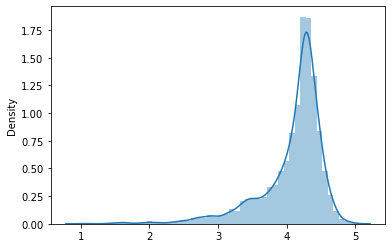

In [16]:
sns.distplot(y_pred);

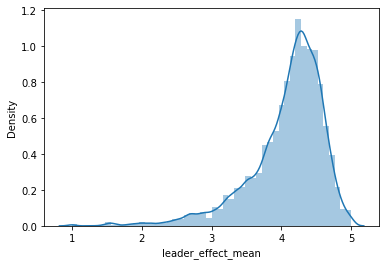

In [19]:
sns.distplot(df_final.leader_effect_mean);

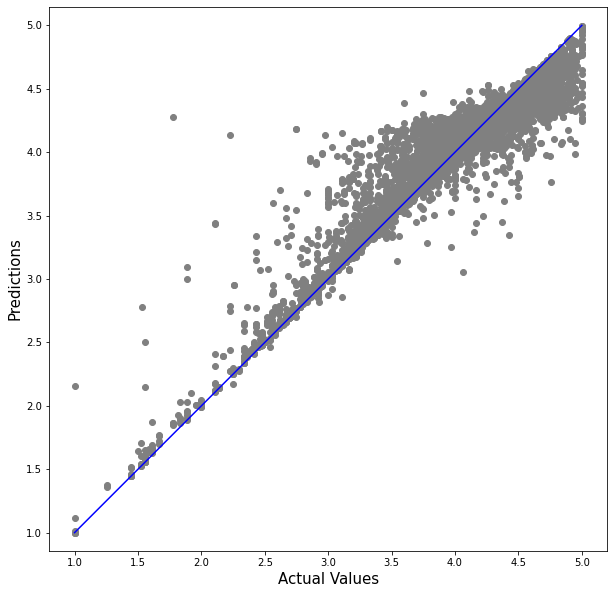

In [20]:
plt.figure(figsize=(10,10))
plt.scatter(test_y_input, y_pred, c='grey')
#plt.yscale('log')
#plt.xscale('log')

p1 = max(max(y_pred), max(test_y_input))
p2 = min(min(y_pred), min(test_y_input))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

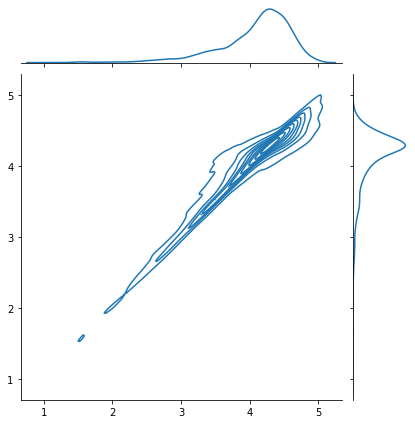

In [21]:
import seaborn as sns
#sns.set_theme(style="ticks")

# Load the penguins dataset
#penguins = sns.load_dataset("penguins")

# Show the joint distribution using kernel density estimation
g = sns.jointplot(
    x=test_y_input, y=y_pred,
    kind="kde",
)

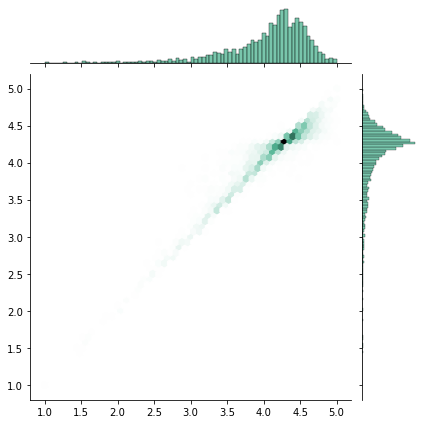

In [22]:
sns.jointplot(x=test_y_input, y=y_pred, kind="hex", color="#4CB391")

## Save Regression Model 


In [23]:
import joblib
#joblib.dump(regr, 'org_regression_model.pkl')
RegressionModel = joblib.load('C:\\Users\\e394102\\Box\\SWPA Work\\OngoingProjects\\Leadership_Analysis\\org_regression_model.pkl')


## Start Data Pipeline on Model

In [24]:
file = "C:\\Users\\e394102\\OneDrive\\Data\\Metrics_Flat.csv"


flat = pd.read_csv(file)
flat.head()

,Unnamed: 0,EmplID,Name,EmployeeStatus,RecordType,Headcount,Domestic Headcount,Leader Headcount,Domestic Leader Headcount,Exec Headcount,...,ProgramManager,RetireLikelihood,RetirePotential,Paygroup,HeritageBA,ReportMonth,ReportMonthNumber,ReportYear,ReportMonthYear,ReportDate
0,1,42,"Crossman,Mark Edward",A,Headcount,1,1,0,0,0,...,Non-PM,Not Eligible,Future Potential Retiree,1WN,hMST,Mar,3,2015,Mar-2015,2015-03-31
1,2,42,"Crossman,Mark Edward",A,Headcount,1,1,0,0,0,...,Non-PM,Not Eligible,Future Potential Retiree,1WN,hMST,Apr,4,2015,Apr-2015,2015-04-30
2,3,42,"Crossman,Mark Edward",A,Headcount,1,1,0,0,0,...,Non-PM,Not Eligible,Future Potential Retiree,1WN,hMST,May,5,2015,May-2015,2015-05-31
3,4,42,"Crossman,Mark Edward",A,Headcount,1,1,0,0,0,...,Non-PM,Not Eligible,Future Potential Retiree,1WN,hMST,Jun,6,2015,Jun-2015,2015-06-30
4,5,42,"Crossman,Mark Edward",A,Headcount,1,1,0,0,0,...,Non-PM,Not Eligible,Future Potential Retiree,1WN,hMST,Jul,7,2015,Jul-2015,2015-07-31


In [25]:

### encode data here for model 
def encode_and_bind(original_dataframe, feature_to_encode):

    two_df = original_dataframe[feature_to_encode]

    dummies_df = pd.get_dummies(two_df)

    df_join = pd.concat([original_dataframe.reset_index(drop=True),dummies_df.reset_index(drop=True)], axis=1)

    ## drop those columns now that they are dummy variables 
    df_join = df_join.drop(feature_to_encode, axis=1) 

    # clean up the index 
    df_join = df_join.reset_index(drop=True) # reset index

    return df_join


def transform_and_predict(df, month = "2020-08-31"):
    
    ## clean up column names and change to lower case
    df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

    ## filter out data to recent date
    recent_data = df[df.reportdate == month]
#    recent_data = df
    
    ## make this will remove hires in the month - ultimately we want one row per person. 
    ## Without will generate a headcount row, term, and hire row in the same month for a person 
#    recent_data = recent_data[recent_data.headcount ==1]
    
    # filter out manager data 
    m= recent_data.emplid.isin(recent_data.managerid)
    manager_df = recent_data[m]
    
    manager_df = manager_df[manager_df.headcount ==1]
    
    ## select manager columns 
    columns_of_interest = ['emplid', 
                           'levelnumber',
                           'yos',
               #            'reviewrating', 
                           'annualized_rate',
                           'comparatio', 
                           'numofemployees',
                         'numoflayers']
    
    manager_df = manager_df[columns_of_interest]
    
    ## rename columns 
    manager_df.columns = ['managerid', 'manager_level', 
                         'manager_yos', 
                      #    'manager_rating', 
                         'manager_rate', 'manager_comparatio', 
                         'manager_numofemployees', 'manager_numoflayers']
    
    df_recent_joined = pd.merge(recent_data, manager_df, left_on='managerid', right_on='managerid', how='left')
    


    columns_of_interest_two = ['emplid', 

                       ### Org Type variables 
             #          'lob_function',
             #          'lob_function_group',
             #          'alt_dept_lob',
             #          'uniondescr', 
                       ## employee and team variables 
             #           'indirect_direct',
                        'levelnumber', 'yos', 
                       #'locationgroup', 
                 #      'reviewrating', 
                       'annualized_rate', 
                        'comparatio', 
                       'numofemployees',
              #                 'fulltime_parttime', 
                         'numoflayers', 'servicestype', 
               #        'highest_education_level_descr',
                       
                       ## time in L code for the manager 
                       ## any other details about the manager 
                       ## Time in Level 
                       ## how satisfied is the manager or other scores for the actual manager 
                       
                     'manager_level',
                     'manager_yos',
               #      'manager_rating',
                     'manager_rate',
                     'manager_comparatio',
                     'manager_numofemployees',
                     'manager_numoflayers',
                       
                       ## job discipline cols
               #        'role',#'jobfamily', 
                               'flsa_status',

                          ]
    
    smaller_df = df_recent_joined[columns_of_interest_two]
    
    key_columns_to_encode = list(smaller_df.select_dtypes(['object']).columns)
    
    encoded_df = encode_and_bind(smaller_df, key_columns_to_encode)
    
    encoded_df['annualized_rate'] = encoded_df['annualized_rate'].fillna((encoded_df['annualized_rate'].mean()))
    encoded_df['levelnumber'] = encoded_df['levelnumber'].fillna((encoded_df['levelnumber'].mean()))
    encoded_df['numoflayers'] = encoded_df['numoflayers'].fillna((encoded_df['levelnumber'].mean()))
    encoded_df['manager_level'] = encoded_df['manager_level'].fillna((encoded_df['manager_level'].mean()))
    encoded_df['manager_yos'] = encoded_df['manager_yos'].fillna((encoded_df['manager_yos'].mean()))
    encoded_df['manager_rate'] = encoded_df['manager_rate'].fillna((encoded_df['manager_rate'].mean()))
    encoded_df['manager_comparatio'] = encoded_df['manager_comparatio'].fillna((encoded_df['manager_comparatio'].mean()))
    encoded_df['manager_numofemployees'] = encoded_df['manager_numofemployees'].fillna((encoded_df['manager_numofemployees'].mean()))
    encoded_df['manager_numoflayers'] = encoded_df['manager_numoflayers'].fillna((encoded_df['manager_numoflayers'].mean()))
    
    X_new = np.array(encoded_df)
    
   # ClassiferModel = joblib.load('C:\\Users\\e394102\\Box\\SWPA Work\\OngoingProjects\\Leadership_Analysis\\org_classifier.pkl')
    RegressionModel = joblib.load('C:\\Users\\e394102\\Box\\SWPA Work\\OngoingProjects\\Leadership_Analysis\\org_regression_model.pkl')



    #y_pred = ClassiferModel.predict(X_new)
    y_pred = RegressionModel.predict(X_new)

    #y_pred_proba = ClassiferModel.predict_proba(X_new)
    
    final_df = df[df.reportdate == month]

  #  final_df = final_df[final_df.headcount ==1]
    
    final_df['predictions'] = y_pred
#    final_df['probabilities'] = y_pred_proba
    
    return final_df 





In [26]:
model_today_df = transform_and_predict(flat, month = "2020-05-31")

model_today_df.shape

(34889, 178)

## pull out leaders for viz

In [27]:
## group by manager id and sum 
groups = model_today_df.groupby('managerid').agg({'predictions': 'mean'})
groups.head(20)

## join to model today df 

model_today_leaders = pd.merge(model_today_df, groups, left_on='emplid', right_on='managerid', how='inner')
model_today_leaders.head(10)

,unnamed:_0,emplid,name,employeestatus,recordtype,headcount,domestic_headcount,leader_headcount,domestic_leader_headcount,exec_headcount,...,retirepotential,paygroup,heritageba,reportmonth,reportmonthnumber,reportyear,reportmonthyear,reportdate,predictions_x,predictions_y
0,185,314,"Luker,Kim M",A,Headcount,1,1,1,1,0,...,Current Potential Retiree,2AC,hMST,May,5,2020,May-2020,2020-05-31,4.302844,4.285499
1,722,850,"Warner,Thomas S",A,Headcount,1,1,1,1,1,...,Non-Potential Retirees,2AC,hMST,May,5,2020,May-2020,2020-05-31,4.744392,4.434454
2,1495,2777,"Ilse,Kenneth Brian",A,Headcount,1,1,1,1,0,...,Current Potential Retiree,1WQ,hMST,May,5,2020,May-2020,2020-05-31,4.209657,4.087291
3,1629,3209,"Ekiko,Mbong C",A,Headcount,1,1,1,1,1,...,Non-Potential Retirees,2AC,hMST,May,5,2020,May-2020,2020-05-31,4.464149,4.281928
4,1919,4023,"Brady,Robert Newton",A,Headcount,1,1,1,1,0,...,Future Potential Retiree,2AC,hMST,May,5,2020,May-2020,2020-05-31,4.266148,4.109459
5,2339,4555,"Penalver,Juan R",A,Headcount,1,1,1,1,1,...,Current Potential Retiree,2AC,hMST,May,5,2020,May-2020,2020-05-31,4.620662,4.435139
6,2660,4981,"Paige,Carl Douglas",A,Headcount,1,1,1,1,0,...,Non-Potential Retirees,2AX,hSAC,May,5,2020,May-2020,2020-05-31,4.437352,4.403989
7,3180,5694,"Vincent,Tammy M",A,Headcount,1,1,1,1,1,...,Future Potential Retiree,2AC,hMST,May,5,2020,May-2020,2020-05-31,4.230981,4.347505
8,6754,8078,"Knox,Robert William",A,Headcount,1,1,1,1,0,...,Current Potential Retiree,2AC,hMST,May,5,2020,May-2020,2020-05-31,4.305089,4.425522
9,7401,8119,"Bradley,Nadine L",A,Headcount,1,1,1,1,0,...,Non-Potential Retirees,2AC,hMST,May,5,2020,May-2020,2020-05-31,3.966912,4.340959


In [28]:
model_today_leaders.shape

model_today_leaders = model_today_leaders.drop(['predictions_x'], axis=1)


model_today_leaders["org_risk_cat"] = pd.qcut(model_today_leaders.predictions_y, 3, labels=["low", "medium", "high"])


model_today_leaders.head()


,unnamed:_0,emplid,name,employeestatus,recordtype,headcount,domestic_headcount,leader_headcount,domestic_leader_headcount,exec_headcount,...,retirepotential,paygroup,heritageba,reportmonth,reportmonthnumber,reportyear,reportmonthyear,reportdate,predictions_y,org_risk_cat
0,185,314,"Luker,Kim M",A,Headcount,1,1,1,1,0,...,Current Potential Retiree,2AC,hMST,May,5,2020,May-2020,2020-05-31,4.285499,medium
1,722,850,"Warner,Thomas S",A,Headcount,1,1,1,1,1,...,Non-Potential Retirees,2AC,hMST,May,5,2020,May-2020,2020-05-31,4.434454,high
2,1495,2777,"Ilse,Kenneth Brian",A,Headcount,1,1,1,1,0,...,Current Potential Retiree,1WQ,hMST,May,5,2020,May-2020,2020-05-31,4.087291,low
3,1629,3209,"Ekiko,Mbong C",A,Headcount,1,1,1,1,1,...,Non-Potential Retirees,2AC,hMST,May,5,2020,May-2020,2020-05-31,4.281928,medium
4,1919,4023,"Brady,Robert Newton",A,Headcount,1,1,1,1,0,...,Future Potential Retiree,2AC,hMST,May,5,2020,May-2020,2020-05-31,4.109459,low


In [29]:
model_today_leaders.shape

(3631, 179)

In [ ]:
#model_today_leaders.to_csv('model_test.csv')